# PCA and  Desision Tree Callification for the "Behavorial Dataset"
In this notebook, we will build and evaluate a Decision Tree Classifier to predict 

In [2]:
pip install DecisionTree    

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import accuracy_score # To evaluate the model
from sklearn import datasets # To get the dataset
from sklearn import tree # to draw a tree   
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA   
import data_outcomes

In [5]:
# Read the data
diabetes_df = data_outcomes.getDiabetesBehaviorDataframe() 

----> Retrieving information for Resources/diabetes_data.csv


In [6]:
# show the first 5 rows of the data set 
diabetes_df.head()


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,0.0
14,10.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38386 entries, 4 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   38386 non-null  float64
 1   Sex                   38386 non-null  float64
 2   HighChol              38386 non-null  float64
 3   CholCheck             38386 non-null  float64
 4   BMI                   38386 non-null  float64
 5   Smoker                38386 non-null  float64
 6   HeartDiseaseorAttack  38386 non-null  float64
 7   PhysActivity          38386 non-null  float64
 8   Fruits                38386 non-null  float64
 9   Veggies               38386 non-null  float64
 10  HvyAlcoholConsump     38386 non-null  float64
 11  GenHlth               38386 non-null  float64
 12  MentHlth              38386 non-null  float64
 13  PhysHlth              38386 non-null  float64
 14  DiffWalk              38386 non-null  float64
 15  Stroke                38

In [8]:
# check for missing values
x = diabetes_df.drop('Diabetes', axis=1)
y = diabetes_df['Diabetes']


In [9]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   
X_scaled = scaler.fit_transform(x)

In [10]:
# Applying PCA
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X_scaled)

In [11]:
# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data = X_pca, columns = ['PCA1', 'PCA2'])
df_pca['Diabetes'] = y

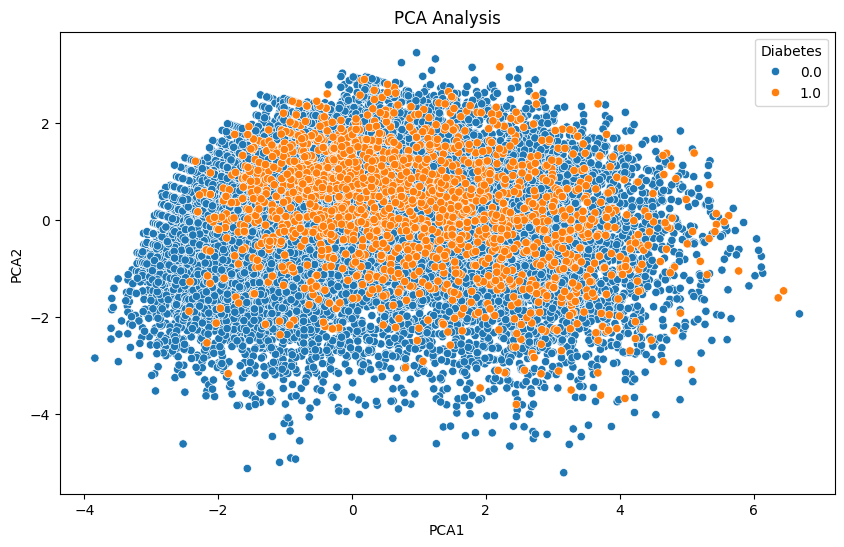

In [35]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_pca, hue='Diabetes')
plt.title('PCA Analysis')
plt.show()

In [37]:
print(f"Explained Variance: {pca.explained_variance_ratio_}")

Explained Variance: [0.20680077 0.09434419]


<Figure size 1000x600 with 0 Axes>

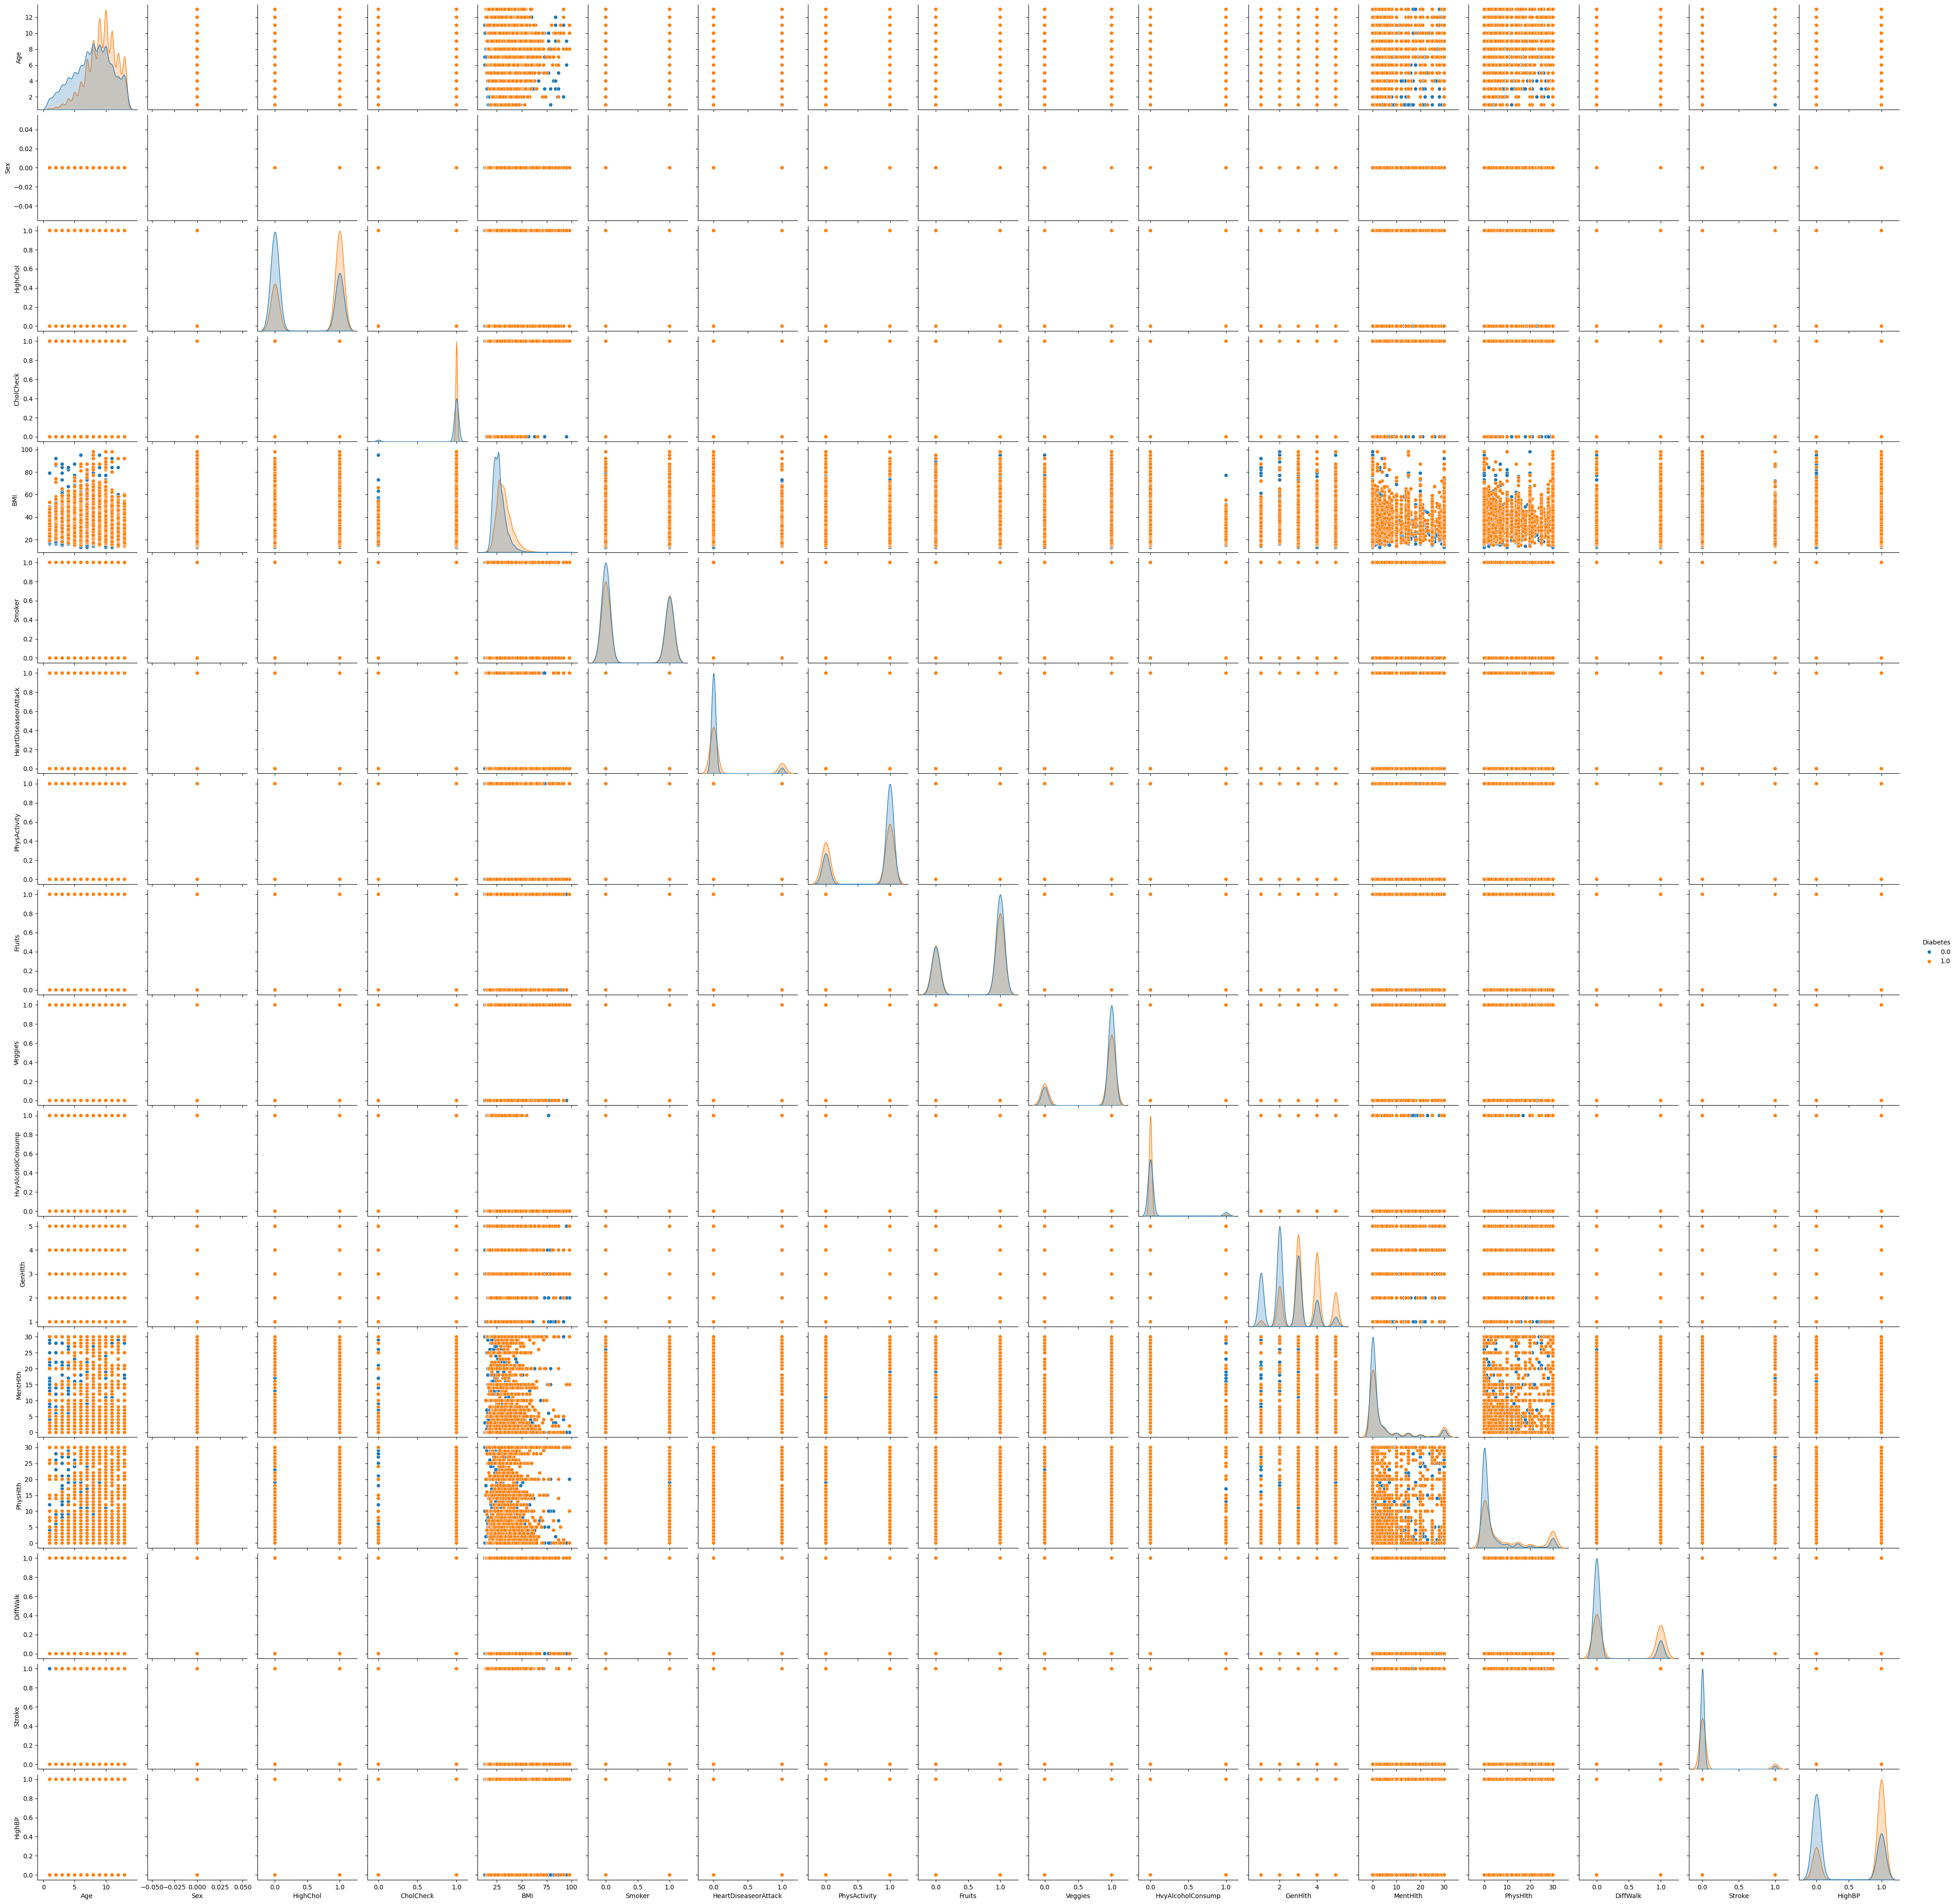

In [12]:
# Bigplot of the data
plt.figure(figsize=(10,6))
sns.pairplot(data=diabetes_df, hue='Diabetes')
plt.show()

In [38]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state =42)

In [39]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6600382077110107


In [44]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68      5989
         1.0       0.65      0.62      0.64      5527

    accuracy                           0.66     11516
   macro avg       0.66      0.66      0.66     11516
weighted avg       0.66      0.66      0.66     11516



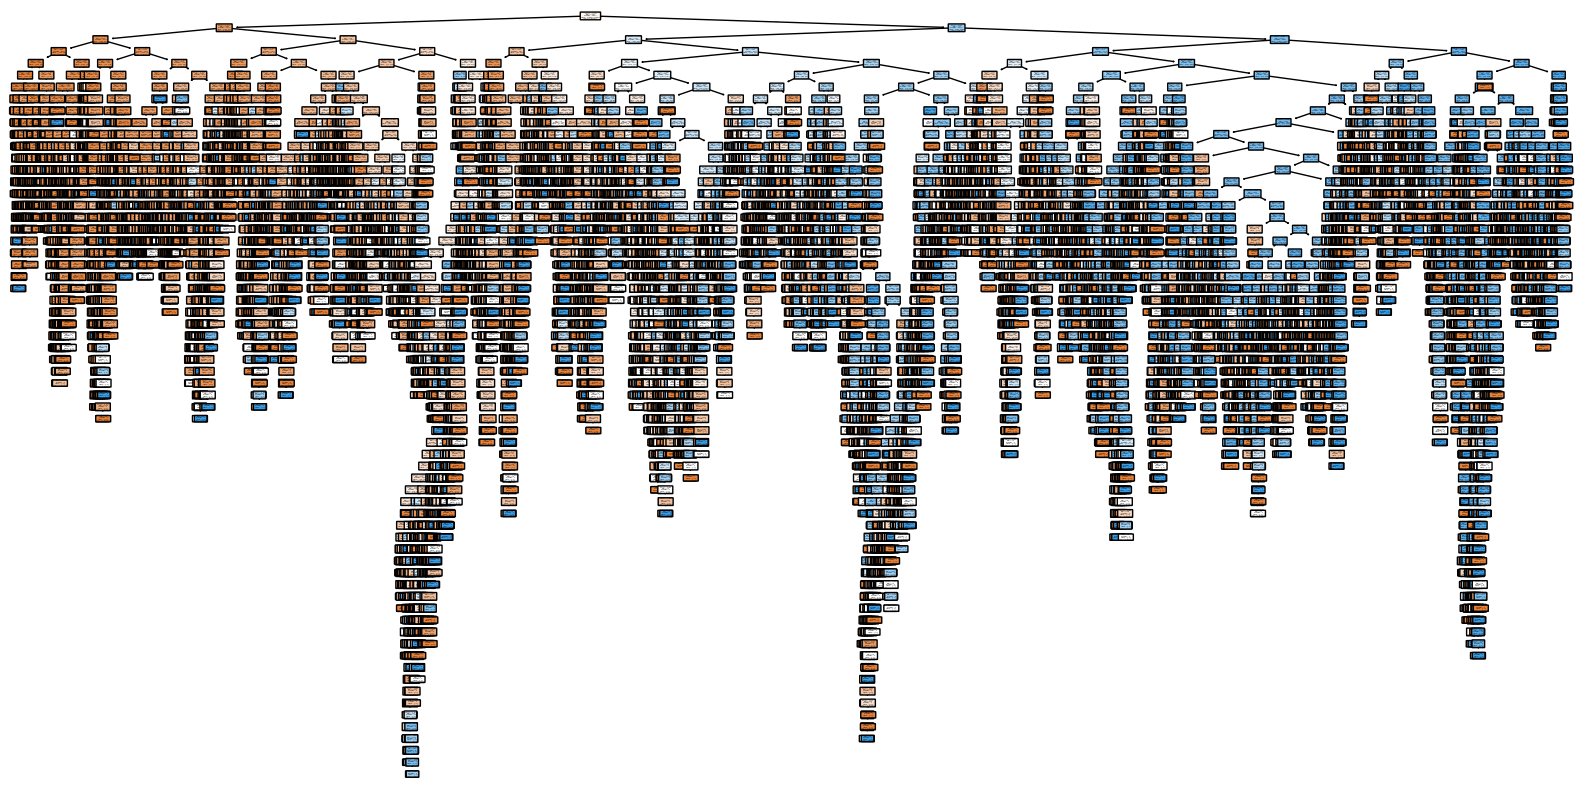

In [41]:
# Visualizing the tree
from sklearn.tree import plot_tree

# Plotting the tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, rounded=True, feature_names=['PCA1', 'PCA2'], class_names=['No Diabetes', 'Diabetes'])
plt.show()

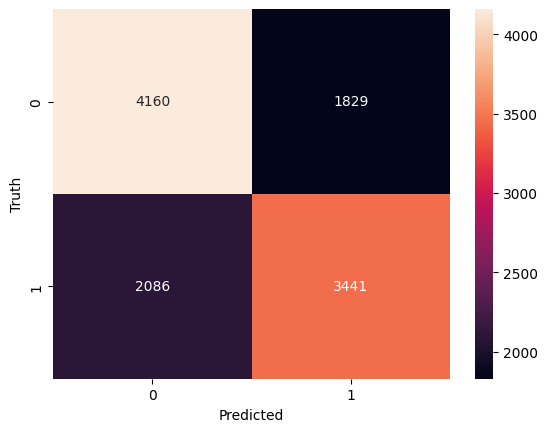

In [42]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [45]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# Create a model
log_reg = LogisticRegression()


In [46]:
# Train the model
log_reg.fit(X_train, y_train)


LogisticRegression()

In [47]:
# Predictions
y_pred = log_reg.predict(X_test)


In [48]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7373219868009726


In [49]:
# Plotting the decision boundary
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train


(-6.2108612229776785, 4.419138777022095)

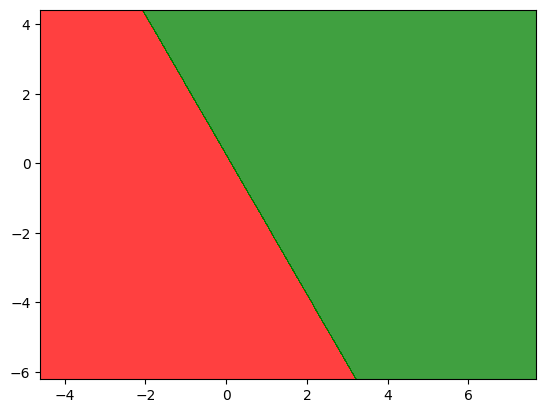

In [50]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


C:\Users\azamora\AppData\Local\Temp\ipykernel_51880\38958251.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


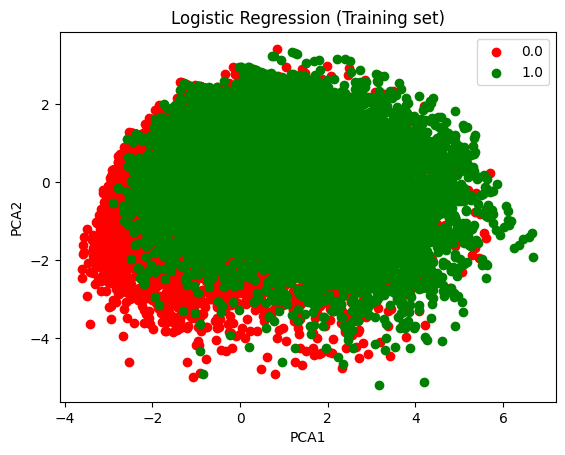

In [51]:
# Plotting the data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


In [1]:
hpv_df = data_outcomes.getHPVBehaviorDataframe()
hpv_df.head()

NameError: name 'data_outcomes' is not defined